# 장단기 메모리(Long Short-Term Memory, LSTM)

* 바닐라 RNN의 한계를 극복하기 위한 다양한 RNN의 변형 중 하나.

## 1. 바닐라 RNN의 한계

* 바닐라 RNN의 정보량 손실을 보여주는 Image

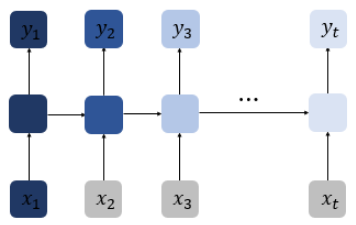

 * 바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다.
 * 하지만 바닐라 RNN은 비교적 짧은 Sequence에 대해서만 효과를 보이는 단점이 있다. <br>
  즉, time step이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못 하는 현상이 발생한다.
 * 이를 장기 의존성 문제(the problem of Long-Term Dependencies)라고 한다.

## 2. 바닐라 RNN의 한계

* 편향 b가 생략된 바닐라 RNN

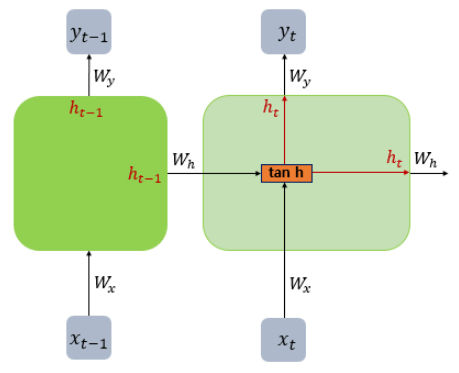

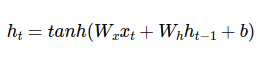

* 바닐라 RNN은 x_t와 h_(t-1)이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 된다. <br>
 그리고 이를 하이퍼볼릭탄젠트 함수의 입력으로 사용하고 이 값은 은닉층의 출력인 은닉 상태가 된다.

## LSTM(Long Short-Term Memory)

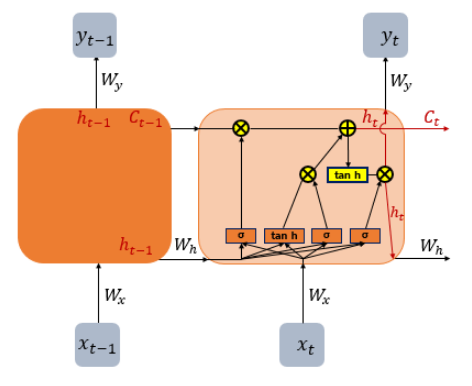

* LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정한다.
* 요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가하였다.
* 위 그림에서는 t 시점의 셀 상태를 C_t로 표현하고 있다.
* LSTM은 RNN과 비교하여 긴 Sequence 입력을 처리하는데 탁월한 성능을 보인다.

### 1) Cell State

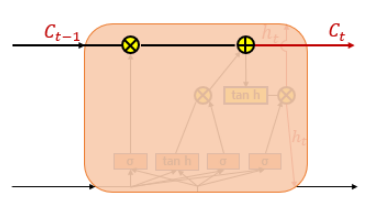

* 셀 상태는 위 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선이다.
* 셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로 사용된다.

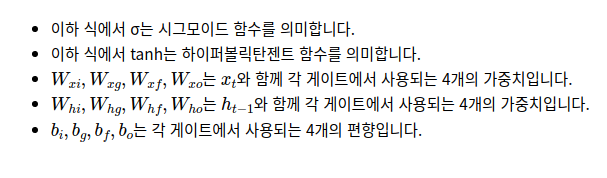


### 2) 입력 게이트

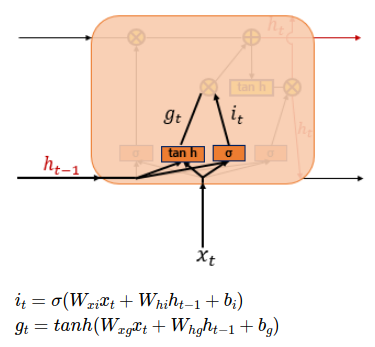

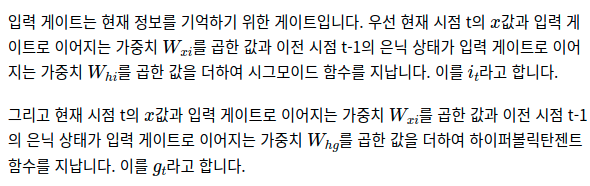

* 시그모이드 함수를 지나 0과 1 사이의 값과 <br>
하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값 두개가 나온다. <br>
이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 결정한다.

### 3) 삭제 게이트

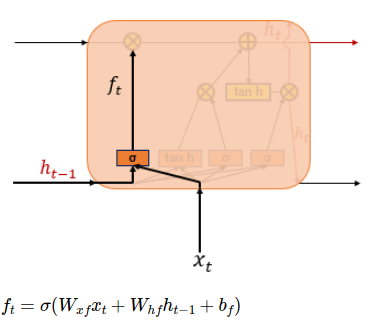

* 삭제 게이트는 기억을 삭제하기 위한 게이트이다.
* 시그모이드 함수를 지나면 0과 1 사이의 값이 나오게 되는데 <br>
 이 값이 곧 삭제 과정을 거친 정보의 양이다. <br>
* 0에 가까울 수록 정보가 많이 삭제된 것이고, <br>
 1에 가까울 수록 정보를 온전히 기억한 것이다.
* 이를 통해 셀 상태를 구하게 된다.

### 4) 셀 상태(장기 상태)

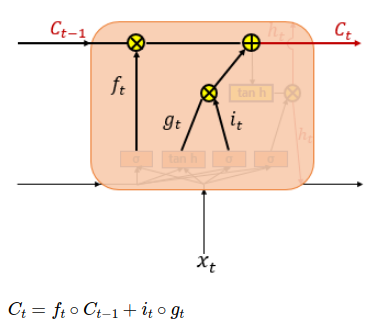

* 셀 상태 C_t를 LSTM에서는 장기 상태라고 부르기도 한다.
* 현재 삭제 게이트에서 일부 기억을 잃은 상태이다.

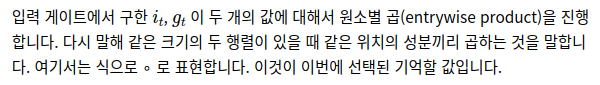

* 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더한다. <br>
 이 값을 현재 시점 t의 셀 상태라고 하며, 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨진다.
 
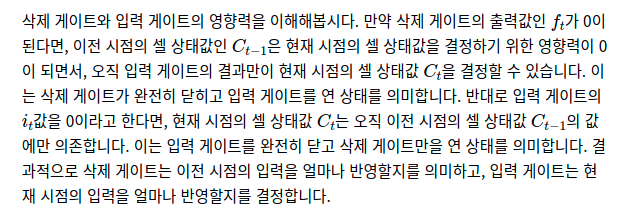


### 5) 출력 게이트와 은닉 태(단기 상태)

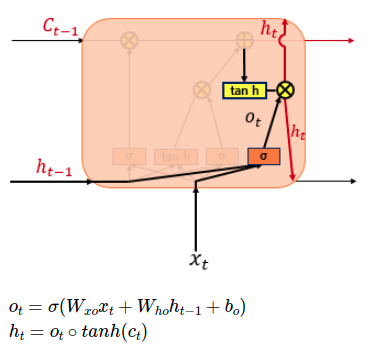

* 출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 <br>
 시그모이드 함수를 지난 값이다.
* 해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 된다.
* 은닉 상태를 단기 상태라고 하기도 한다. <br>
 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값이 되고 <br>
 해당 값은 출력 게이트의 값과 연산되면서 값이 걸러지는 효과가 발생하여 은닉상태가 된다.
* 단기 상태의 값은 또한 출력층으로도 향한다.